In [6]:
# import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
# load dataset
car_data = pd.read_excel(r"C:\Users\Arne Jandt\anaconda3\envs\UebungenProjekt\output_data_10.xlsx")
car_data.head()

,Version,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss,tokenized,feature_M,feature_xDrive,feature_Sport,feature_d,feature_Navi
0,xDrive 30e Advantage Steptronic,43490,42092,20200901,215,1,1,3,49,"['xDrive', '30e', 'Advantage', 'Steptronic']",0,1,0,0,0
1,xDrive30i Leder Pano Totwinkel HiFi Kamera Navi,59510,0,19700101,180,2,1,1,175,"['xDrive30i', 'Leder', 'Pano', 'Totwinkel', 'H...",0,0,0,0,1
2,xDrive20d HUD DA+ Pano PA+ Sportsitze AHK,46490,16100,20201101,140,1,1,2,126,"['xDrive20d', 'HUD', 'DA', '+', 'Pano', 'PA', ...",0,0,0,0,0
3,xDrive20i Advatage Aut. Navi PDC RFK AHK LED,34630,56100,20191101,135,1,1,1,151,"['xDrive20i', 'Advatage', 'Aut', '.', 'Navi', ...",0,0,0,0,1
4,xDrive30d M Sport (Gestiksteuerung Head-Up),44290,58417,20190701,195,1,1,2,157,"['xDrive30d', 'M', 'Sport', '(', 'Gestiksteuer...",1,0,1,0,0


In [8]:
# removing columns
cleaned_car_data = car_data.drop(['Version','tokenized'],axis=1)

In [9]:
# inspect cleaned data
cleaned_car_data.head()

,Price,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss,feature_M,feature_xDrive,feature_Sport,feature_d,feature_Navi
0,43490,42092,20200901,215,1,1,3,49,0,1,0,0,0
1,59510,0,19700101,180,2,1,1,175,0,0,0,0,1
2,46490,16100,20201101,140,1,1,2,126,0,0,0,0,0
3,34630,56100,20191101,135,1,1,1,151,0,0,0,0,1
4,44290,58417,20190701,195,1,1,2,157,1,0,1,0,0


In [5]:
# looking up column data type
cleaned_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8979 entries, 0 to 8978
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   8979 non-null   int64
 1   car_kilometerstand      8979 non-null   int64
 2   car_erstzulassung       8979 non-null   int64
 3   car_leistung            8979 non-null   int64
 4   car_gebraucht_oder_new  8979 non-null   int64
 5   car_getriebe            8979 non-null   int64
 6   car_kraftstoff          8979 non-null   int64
 7   car_co2_ausstoss        8979 non-null   int64
 8   feature_M               8979 non-null   int64
 9   feature_xDrive          8979 non-null   int64
 10  feature_Sport           8979 non-null   int64
 11  feature_d               8979 non-null   int64
 12  feature_Navi            8979 non-null   int64
dtypes: int64(13)
memory usage: 912.1 KB


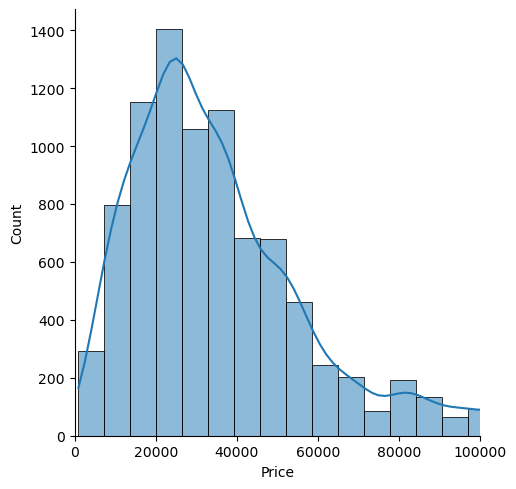

In [40]:
# show price distribution
g = sns.displot(cleaned_car_data['Price'],bins=50, kde=True)
g.set(xlim=(0,100000))

<AxesSubplot:>

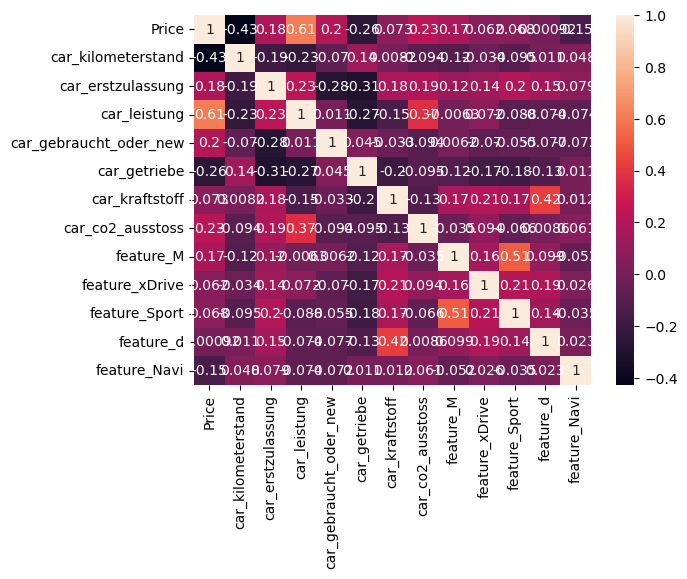

In [6]:
# shows correlation between features
sns.heatmap(cleaned_car_data.corr(), annot=True)

In [41]:
# determine features and target variable
X = cleaned_car_data.drop('Price',axis=1)
y = cleaned_car_data['Price']
X.head(5)

,car_kilometerstand,car_erstzulassung,car_leistung,car_gebraucht_oder_new,car_getriebe,car_kraftstoff,car_co2_ausstoss,feature_M,feature_xDrive,feature_Sport,feature_d,feature_Navi
0,42092,20200901,215,1,1,3,49,0,1,0,0,0
1,0,19700101,180,2,1,1,175,0,0,0,0,1
2,16100,20201101,140,1,1,2,126,0,0,0,0,0
3,56100,20191101,135,1,1,1,151,0,0,0,0,1
4,58417,20190701,195,1,1,2,157,1,0,1,0,0


In [42]:
# split dataset in test and train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [43]:
# fit Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
# looking up model parameters
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [45]:
# looking up model intercept
model.intercept_

-97843.11917862628

In [12]:
# calculate coefficents for model
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
car_kilometerstand,-0.108035
car_erstzulassung,0.004615
car_leistung,165.703088
car_gebraucht_oder_new,6859.764834
car_getriebe,-2164.856170
car_kraftstoff,6662.978529
car_co2_ausstoss,15.575769
feature_M,6173.281006
feature_xDrive,-2271.887803
feature_Sport,1091.526823


In [46]:
# model prediction
y_pred = model.predict(X_test)
pd.DataFrame({'Test':y_test,'Pred':y_pred}).head(5)

,Test,Pred
4845,19990,9561.337247
5666,14950,19394.824723
8156,16950,20628.691740
688,41999,40553.221868
7111,97800,83517.153944


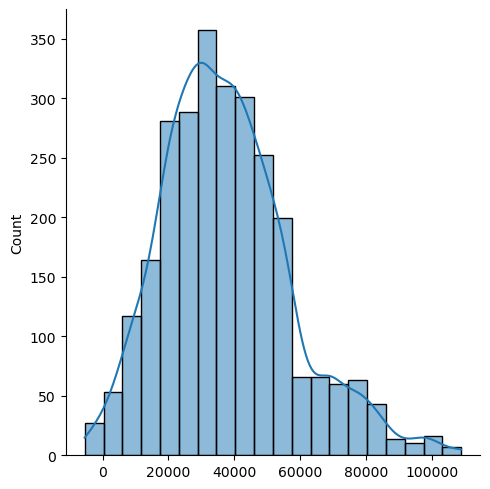

In [47]:
# shows distribution of y_pred
sns.displot(y_pred, bins=20, kde=True)

In [48]:
#evaluation of the model
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.135721e+04
MSE,3.420948e+08
RMSE,1.849581e+04


Text(0, 0.5, 'Y-Pred')

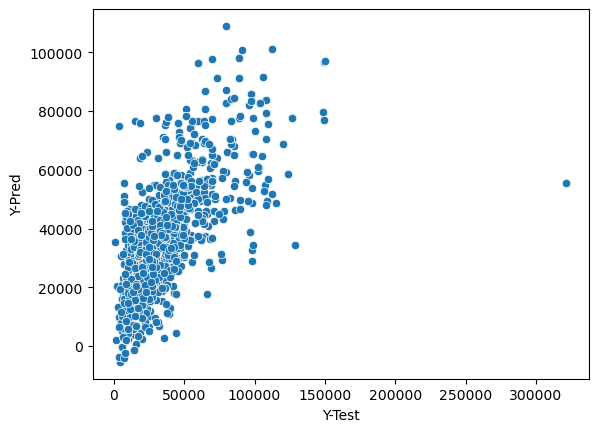

In [49]:
# visualize test residuals
test_residuals=y_test-y_pred
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

Text(0, 0.5, 'Y-Pred')

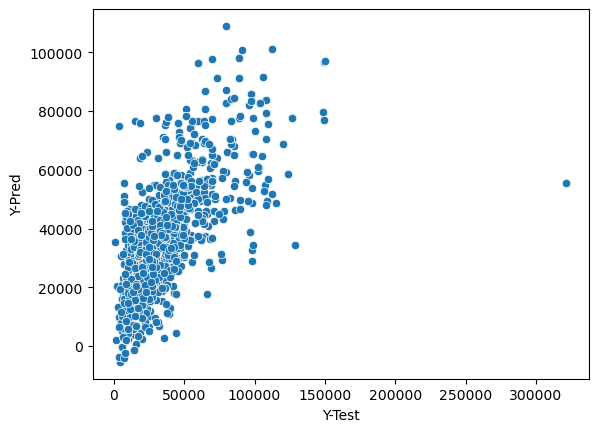

In [51]:
# visualize test residuals
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')